In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [60]:
pd.read_csv("final_transition_out_of_poss_df.csv")

,uniqueTeamId,Air duel_Zone_1,Air duel_Zone_2,Air duel_Zone_3,Foul_Zone_1,Foul_Zone_2,Foul_Zone_3,Ground attacking duel_Zone_1,Ground attacking duel_Zone_2,Ground attacking duel_Zone_3,...,Zone_2_Run,Zone_3_Run,Backward Run,Forward Run,Side Run,Short Run,Middle Run,Long Run,average_acceleration_length,Forward_Runs_Zone_3
0,10531---2499726,4,6,3,0,3,1,4,19,11,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.911288,0.0
1,10531---2499736,4,9,2,2,3,1,10,11,11,...,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,25.469525,1.0
2,10531---2499741,10,4,3,0,3,0,3,13,15,...,4.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,34.351247,0.0
3,10531---2499757,8,4,5,0,1,2,6,11,10,...,1.0,0.0,0.0,3.0,1.0,1.0,0.0,3.0,43.278582,0.0
4,10531---2499766,4,9,6,2,1,1,9,11,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,756---2565880,5,4,10,1,4,2,7,14,27,...,4.0,1.0,0.0,6.0,0.0,2.0,2.0,2.0,26.437137,1.0
3648,756---2565892,2,7,4,2,8,3,3,21,10,...,5.0,1.0,0.0,7.0,0.0,2.0,3.0,2.0,30.048182,1.0
3649,756---2565904,13,14,3,2,2,1,13,13,12,...,2.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,26.824966,0.0
3650,756---2565908,5,10,4,0,4,4,4,16,18,...,5.0,1.0,0.0,6.0,1.0,4.0,2.0,1.0,22.850920,1.0


In [2]:
final_df = pd.read_csv("final_transition_out_of_poss_df.csv")
team_ids = final_df['uniqueTeamId']

In [3]:
final_df

,uniqueTeamId,Air duel_Zone_1,Air duel_Zone_2,Air duel_Zone_3,Foul_Zone_1,Foul_Zone_2,Foul_Zone_3,Ground attacking duel_Zone_1,Ground attacking duel_Zone_2,Ground attacking duel_Zone_3,...,Zone_2_Run,Zone_3_Run,Backward Run,Forward Run,Side Run,Short Run,Middle Run,Long Run,average_acceleration_length,Forward_Runs_Zone_3
0,10531---2499726,4,6,3,0,3,1,4,19,11,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.911288,0.0
1,10531---2499736,4,9,2,2,3,1,10,11,11,...,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,25.469525,1.0
2,10531---2499741,10,4,3,0,3,0,3,13,15,...,4.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,34.351247,0.0
3,10531---2499757,8,4,5,0,1,2,6,11,10,...,1.0,0.0,0.0,3.0,1.0,1.0,0.0,3.0,43.278582,0.0
4,10531---2499766,4,9,6,2,1,1,9,11,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,756---2565880,5,4,10,1,4,2,7,14,27,...,4.0,1.0,0.0,6.0,0.0,2.0,2.0,2.0,26.437137,1.0
3648,756---2565892,2,7,4,2,8,3,3,21,10,...,5.0,1.0,0.0,7.0,0.0,2.0,3.0,2.0,30.048182,1.0
3649,756---2565904,13,14,3,2,2,1,13,13,12,...,2.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,26.824966,0.0
3650,756---2565908,5,10,4,0,4,4,4,16,18,...,5.0,1.0,0.0,6.0,1.0,4.0,2.0,1.0,22.850920,1.0


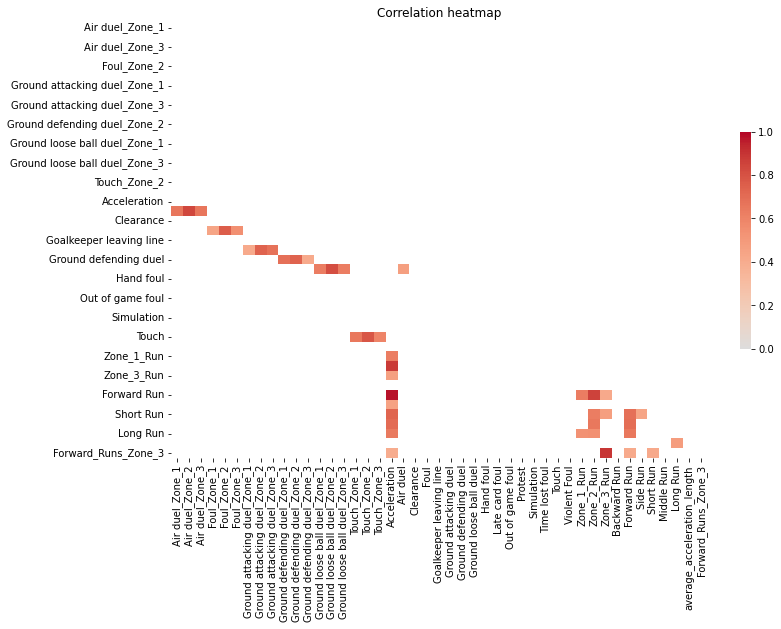

In [4]:
corr = final_df.drop(["uniqueTeamId"], axis = 1).corr().abs()
corr[corr.abs() < 0.4] = np.nan

plt.figure(figsize=(12, 8))
sns.heatmap(corr.abs(), cmap="coolwarm", 
            mask=np.triu(np.ones_like(corr.abs(), dtype=bool)),
            cbar_kws={"shrink": .5}, vmin=0, vmax=1, center= 0)
plt.title('Correlation heatmap')
plt.show()

In [5]:
final_df.set_index("uniqueTeamId", inplace = True)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# 1. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)
# Note: PCA's n_components set to 0.9 means PCA will select the minimum number of components such that at least 90% of the variance is retained.

In [7]:
scaled_data

array([[-0.25622218, -0.74234261, -0.54745316, ..., -1.08851972,
        -0.024577  , -0.53909156],
       [-0.25622218, -0.12838431, -0.83927902, ..., -0.36482155,
        -0.28218499,  1.03717937],
       [ 1.49771111, -1.15164814, -0.54745316, ..., -0.36482155,
         0.65484403, -0.53909156],
       ...,
       [ 2.37467776,  0.89487952, -0.54745316, ..., -0.36482155,
        -0.1391849 , -0.53909156],
       [ 0.03610003,  0.07626846, -0.25562731, ..., -0.36482155,
        -0.55844999,  1.03717937],
       [ 0.03610003, -1.15164814, -0.83927902, ...,  0.35887661,
         0.83002738, -0.53909156]])

In [8]:
# 2. Apply PCA
pca = PCA(n_components=2) 
final_df_scaled = pca.fit_transform(scaled_data)

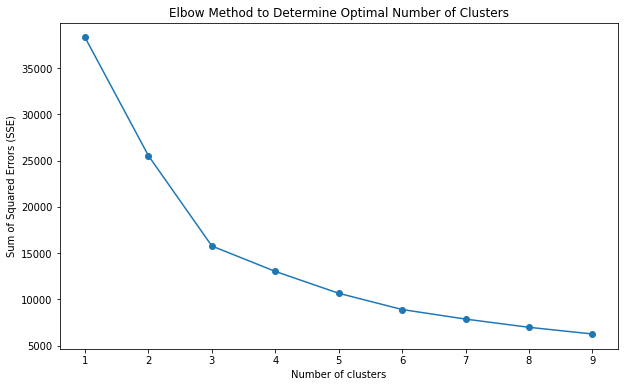

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 10) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(final_df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

k = 3

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(final_df_scaled)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, random_state=0)  
gmm_clusters = gmm.fit_predict(final_df_scaled)

# Applying Bisecting K-Means Clustering
bkmeans = BisectingKMeans(n_clusters=k, random_state=0)
bkmeans_labels = bkmeans.fit_predict(final_df_scaled)

# Creating a DataFrame to see the cluster labels alongside team IDs
clustered_teams = pd.DataFrame({'TeamID': team_ids, 'KMeans_Labels': kmeans_labels, 'GMM_Labels': gmm_clusters, 'BKMeans_Labels': bkmeans_labels})

In [11]:
from sklearn.metrics import silhouette_score

# Calculating the average silhouette score for KMeans clustering
silhouette_avg_kmeans = silhouette_score(final_df_scaled, kmeans_labels)
print(f"Average Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans:.3f}")

# Calculating the average silhouette score for Gaussian Mixture Model clustering
silhouette_avg_gmm = silhouette_score(final_df_scaled, gmm_clusters)
print(f"Average Silhouette Score for Gaussian Mixture Model Clustering: {silhouette_avg_gmm:.3f}")

# Calculating the average silhouette score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(final_df_scaled, bkmeans_labels)
print(f"Average Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Average Silhouette Score for KMeans Clustering: 0.372
Average Silhouette Score for Gaussian Mixture Model Clustering: 0.368
Average Silhouette Score for Hierarchical Clustering: 0.335


In [12]:
k_clustered_teams = clustered_teams.drop(columns=['GMM_Labels', 'BKMeans_Labels'])
final_df.reset_index(inplace = True)
df_with_clusters = final_df.merge(k_clustered_teams, left_on='uniqueTeamId', right_on='TeamID')
df_with_clusters["matchId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[1].astype(int)
df_with_clusters["teamId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[0].astype(int)
df_with_clusters = df_with_clusters.drop([col for col in df_with_clusters.columns if "ID" in col or "Id" in col], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = df_with_clusters

# Split the DataFrame into features (X) and the target variable (y)
X = df.drop('KMeans_Labels', axis=1)
y = df['KMeans_Labels']

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store the evaluation metrics of each model
evaluation_metrics = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    evaluation_metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

evaluation_metrics

{'Logistic Regression': {'Accuracy': 0.9890560875512996,
  'Precision': 0.98907104887501,
  'Recall': 0.9890560875512996,
  'F1 Score': 0.9890603897363548},
 'Support Vector Machine': {'Accuracy': 0.9548563611491108,
  'Precision': 0.9550140343063301,
  'Recall': 0.9548563611491108,
  'F1 Score': 0.954858992909511},
 'Random Forest': {'Accuracy': 0.9302325581395349,
  'Precision': 0.9306120565093587,
  'Recall': 0.9302325581395349,
  'F1 Score': 0.9301549334486593},
 'K-Nearest Neighbors': {'Accuracy': 0.8454172366621067,
  'Precision': 0.8655155079255598,
  'Recall': 0.8454172366621067,
  'F1 Score': 0.8452516449138667}}

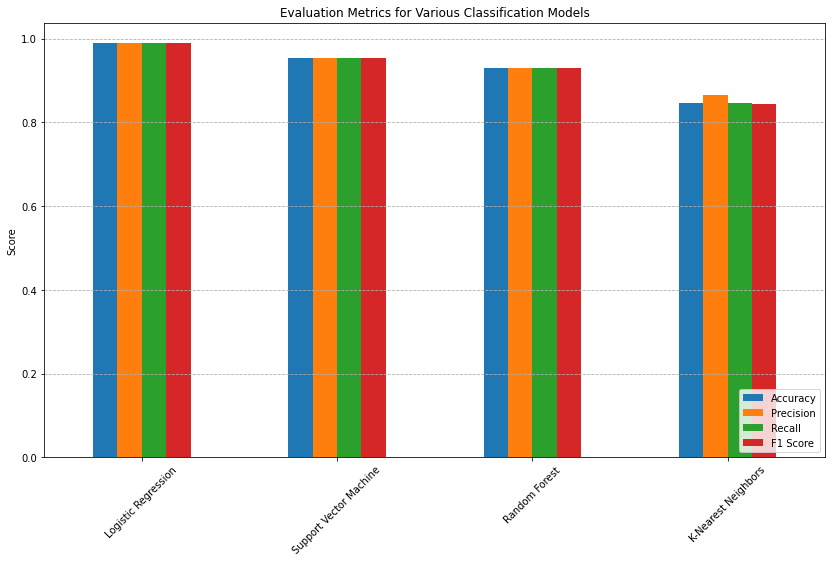

In [14]:
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plotting
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Evaluation Metrics for Various Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(loc='lower right')
plt.show()


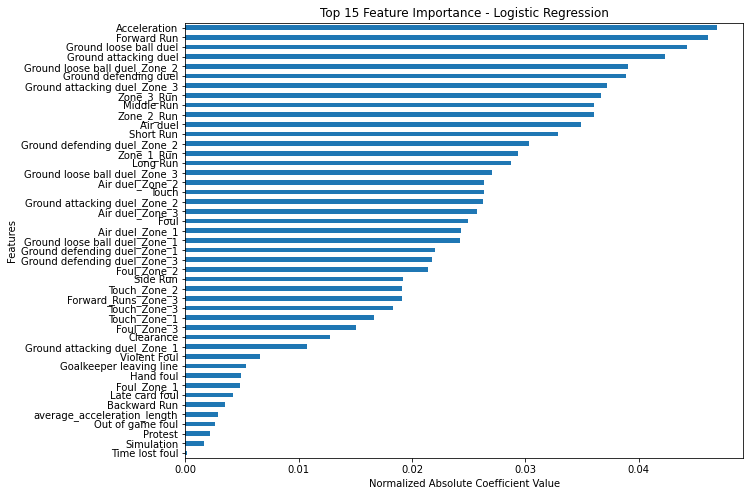

In [15]:
# Preprocessing steps
X = df.drop('KMeans_Labels', axis=1)
y = df['KMeans_Labels']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Extract the coefficients
coefficients = logistic_model.coef_[0]

# Take the absolute value of the coefficients and normalize
abs_coefficients = np.abs(coefficients)
normalized_coefficients = abs_coefficients / abs_coefficients.sum()

# Map normalized coefficients to feature names
feature_importance = pd.Series(normalized_coefficients, index=X.columns)

# Sorting the features by importance and selecting the top 15
top_15_features = feature_importance.sort_values(ascending=False).head(15)

# Plotting the top 15 features
plt.figure(figsize=(10, 8))
feature_importance.sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importance - Logistic Regression')
plt.xlabel('Normalized Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()

In [16]:
top10 = list(dict(feature_importance.sort_values(ascending=False).head(10)).keys())
selected_features_df = final_df.loc[:, top10]
selected_features_df.fillna(0, inplace=True)


###
selected_features_df = final_df.copy()

In [17]:
scaler = StandardScaler()
selected_features_df.fillna(0, inplace=True)
scaled_data = scaler.fit_transform(selected_features_df.iloc[:,1:])

pca = PCA(n_components=2)
final_df_scaled = pca.fit_transform(scaled_data)

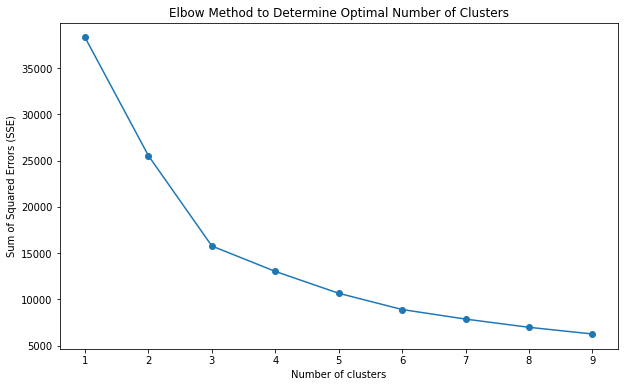

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 10) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(final_df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

k = 3

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(final_df_scaled)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, random_state=0)  
gmm_clusters = gmm.fit_predict(final_df_scaled)

# Applying Bisecting K-Means Clustering
bkmeans = BisectingKMeans(n_clusters=k, random_state=0)
bkmeans_labels = bkmeans.fit_predict(final_df_scaled)

# Creating a DataFrame to see the cluster labels alongside team IDs
clustered_teams = pd.DataFrame({'TeamID': team_ids, 'KMeans_Labels': kmeans_labels, 'GMM_Labels': gmm_clusters, 'BKMeans_Labels': bkmeans_labels})

In [20]:
from sklearn.metrics import silhouette_score

# Calculating the average silhouette score for KMeans clustering
silhouette_avg_kmeans = silhouette_score(final_df_scaled, kmeans_labels)
print(f"Average Silhouette Score for KMeans Clustering: {silhouette_avg_kmeans:.3f}")

# Calculating the average silhouette score for Gaussian Mixture Model clustering
silhouette_avg_gmm = silhouette_score(final_df_scaled, gmm_clusters)
print(f"Average Silhouette Score for Gaussian Mixture Model Clustering: {silhouette_avg_gmm:.3f}")

# Calculating the average silhouette score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(final_df_scaled, bkmeans_labels)
print(f"Average Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Average Silhouette Score for KMeans Clustering: 0.372
Average Silhouette Score for Gaussian Mixture Model Clustering: 0.368
Average Silhouette Score for Hierarchical Clustering: 0.335


In [21]:
with open("../matches/matches_England.json", "r") as file:
    matches_data_2 = json.load(file)

matches2 = pd.DataFrame(matches_data_2)

with open("../matches/matches_France.json", "r") as file:
    matches_data_3 = json.load(file)

matches3 = pd.DataFrame(matches_data_3)

with open("../matches/matches_Germany.json", "r") as file:
    matches_data_4 = json.load(file)

matches4 = pd.DataFrame(matches_data_4)

with open("../matches/matches_Italy.json", "r") as file:
    matches_data_5 = json.load(file)

matches5 = pd.DataFrame(matches_data_5)

with open("../matches/matches_Spain.json", "r") as file:
    matches_data_6 = json.load(file)

matches6 = pd.DataFrame(matches_data_6)

all_matches_df = pd.concat([matches2, matches3, matches4, matches5, matches6], ignore_index=True)

with open("../events/teams.json", "r") as file:
    teams_data = json.load(file)

teams_df = pd.DataFrame(teams_data)

In [22]:
final_df = final_df.reset_index()
df_with_clusters = final_df.merge(clustered_teams, left_on='uniqueTeamId', right_on='TeamID')
df_with_clusters["matchId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[1].astype(int)
df_with_clusters["teamId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[0].astype(int)

In [23]:
matches_with_clusters = df_with_clusters.merge(all_matches_df, left_on='matchId', right_on='wyId')

In [24]:
matches_with_clusters['Match_Result'] = matches_with_clusters.apply(
    lambda row: 'Draw' if row['winner'] == 0 else ('Win' if row['winner'] == row['teamId'] else 'Lose'), axis=1)

# Group by cluster label and match result
outcome_counts = matches_with_clusters.groupby(['KMeans_Labels', 'Match_Result']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

In [25]:
outcome_percentages

Match_Result,Draw,Lose,Win
KMeans_Labels,,,
0,21.600000,43.066667,35.333333
1,24.379233,28.555305,47.065463
2,29.067930,37.361769,33.570300


In [26]:
# Map each team to its cluster
team_to_cluster_map = dict(zip(clustered_teams['TeamID'], clustered_teams['KMeans_Labels']))

# Create a function to get opponent cluster
def get_opponent_cluster(row):
    for team in row['teamsData']:
        if int(team) != int(row['teamId']):
            t = str(team)
            m = str(row['matchId'])
            g = t + "---" + m
            return team_to_cluster_map.get(g)
    

matches_with_clusters['Opponent_Cluster'] = matches_with_clusters.apply(get_opponent_cluster, axis=1)

In [27]:
# Grouping by cluster and opponent cluster
grouped = matches_with_clusters.groupby(['KMeans_Labels', 'Opponent_Cluster', 'Match_Result'])

# Counting occurrences
outcome_counts = grouped.size().unstack(fill_value=0)

# Calculating percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Reshaping for a 9x3 matrix
outcome_matrix = outcome_percentages.unstack()

In [28]:
outcome_matrix

Match_Result           Draw                             Lose             \
Opponent_Cluster          0          1          2          0          1   
KMeans_Labels                                                             
0                 21.980198  20.204604  23.232323  39.009901  54.731458   
1                 20.204604  28.440367  27.075812  25.063939  35.779817   
2                 23.232323  27.075812  30.337079  38.383838  45.126354   

Match_Result                       Win                        
Opponent_Cluster          2          0          1          2  
KMeans_Labels                                                 
0                 38.383838  39.009901  25.063939  38.383838  
1                 27.797834  54.731458  35.779817  45.126354  
2                 34.831461  38.383838  27.797834  34.831461

# ÇOĞUNLUK OYLMASI YAP

In [29]:
matches_with_clusters.columns

Index(['index', 'uniqueTeamId', 'Air duel_Zone_1', 'Air duel_Zone_2',
       'Air duel_Zone_3', 'Foul_Zone_1', 'Foul_Zone_2', 'Foul_Zone_3',
       'Ground attacking duel_Zone_1', 'Ground attacking duel_Zone_2',
       'Ground attacking duel_Zone_3', 'Ground defending duel_Zone_1',
       'Ground defending duel_Zone_2', 'Ground defending duel_Zone_3',
       'Ground loose ball duel_Zone_1', 'Ground loose ball duel_Zone_2',
       'Ground loose ball duel_Zone_3', 'Touch_Zone_1', 'Touch_Zone_2',
       'Touch_Zone_3', 'Acceleration', 'Air duel', 'Clearance', 'Foul',
       'Goalkeeper leaving line', 'Ground attacking duel',
       'Ground defending duel', 'Ground loose ball duel', 'Hand foul',
       'Late card foul', 'Out of game foul', 'Protest', 'Simulation',
       'Time lost foul', 'Touch', 'Violent Foul', 'Zone_1_Run', 'Zone_2_Run',
       'Zone_3_Run', 'Backward Run', 'Forward Run', 'Side Run', 'Short Run',
       'Middle Run', 'Long Run', 'average_acceleration_length',
       'Fo

In [30]:
matches_with_clusters

,index,uniqueTeamId,Air duel_Zone_1,Air duel_Zone_2,Air duel_Zone_3,Foul_Zone_1,Foul_Zone_2,Foul_Zone_3,Ground attacking duel_Zone_1,Ground attacking duel_Zone_2,...,winner,venue,wyId,label,date,referees,duration,competitionId,Match_Result,Opponent_Cluster
0,0,10531---2499726,4,6,3,0,3,1,4,19,...,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Draw,0
1,228,1619---2499726,3,6,4,1,4,1,5,11,...,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Draw,0
2,1,10531---2499736,4,9,2,2,3,1,10,11,...,1611,Liberty Stadium,2499736,"Swansea City - Manchester United, 0 - 4","August 19, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Lose,1
3,115,1611---2499736,2,9,7,0,3,1,4,15,...,1611,Liberty Stadium,2499736,"Swansea City - Manchester United, 0 - 4","August 19, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Win,0
4,2,10531---2499741,10,4,3,0,3,0,3,13,...,10531,Selhurst Park,2499741,"Crystal Palace - Swansea City, 0 - 2","August 26, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385911, 'role': 'referee'}, {'r...",Regular,364,Win,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,3600,714---2565792,11,9,6,0,6,4,9,14,...,0,Estadio Municipal de Butarque,2565792,"Legan\u00e9s - Las Palmas, 0 - 0","February 24, 2018 at 6:30:00 PM GMT+1","[{'refereeId': 381854, 'role': 'referee'}, {'r...",Regular,795,Draw,2
3648,3594,714---2565728,3,8,3,1,6,1,5,14,...,756,Estadi Municipal de Montilivi,2565728,"Girona - Las Palmas, 6 - 0","January 13, 2018 at 1:00:00 PM GMT+1","[{'refereeId': 420995, 'role': 'referee'}, {'r...",Regular,795,Lose,1
3649,3632,756---2565728,3,8,3,4,2,3,7,22,...,756,Estadi Municipal de Montilivi,2565728,"Girona - Las Palmas, 6 - 0","January 13, 2018 at 1:00:00 PM GMT+1","[{'refereeId': 420995, 'role': 'referee'}, {'r...",Regular,795,Win,0
3650,3613,714---2565923,2,4,5,0,2,0,10,25,...,756,Estadio de Gran Canaria,2565923,"Las Palmas - Girona, 1 - 2","May 19, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 381854, 'role': 'referee'}, {'r...",Regular,795,Lose,0


In [31]:
clustered_teams

,TeamID,KMeans_Labels,GMM_Labels,BKMeans_Labels
0,10531---2499726,0,0,2
1,10531---2499736,0,0,2
2,10531---2499741,0,0,2
3,10531---2499757,0,0,2
4,10531---2499766,0,0,2
...,...,...,...,...
3647,756---2565880,1,1,1
3648,756---2565892,1,1,1
3649,756---2565904,2,2,0
3650,756---2565908,1,1,1


In [32]:
clustered_teams_with_names = matches_with_clusters.merge(teams_df, left_on='teamId', right_on='wyId')

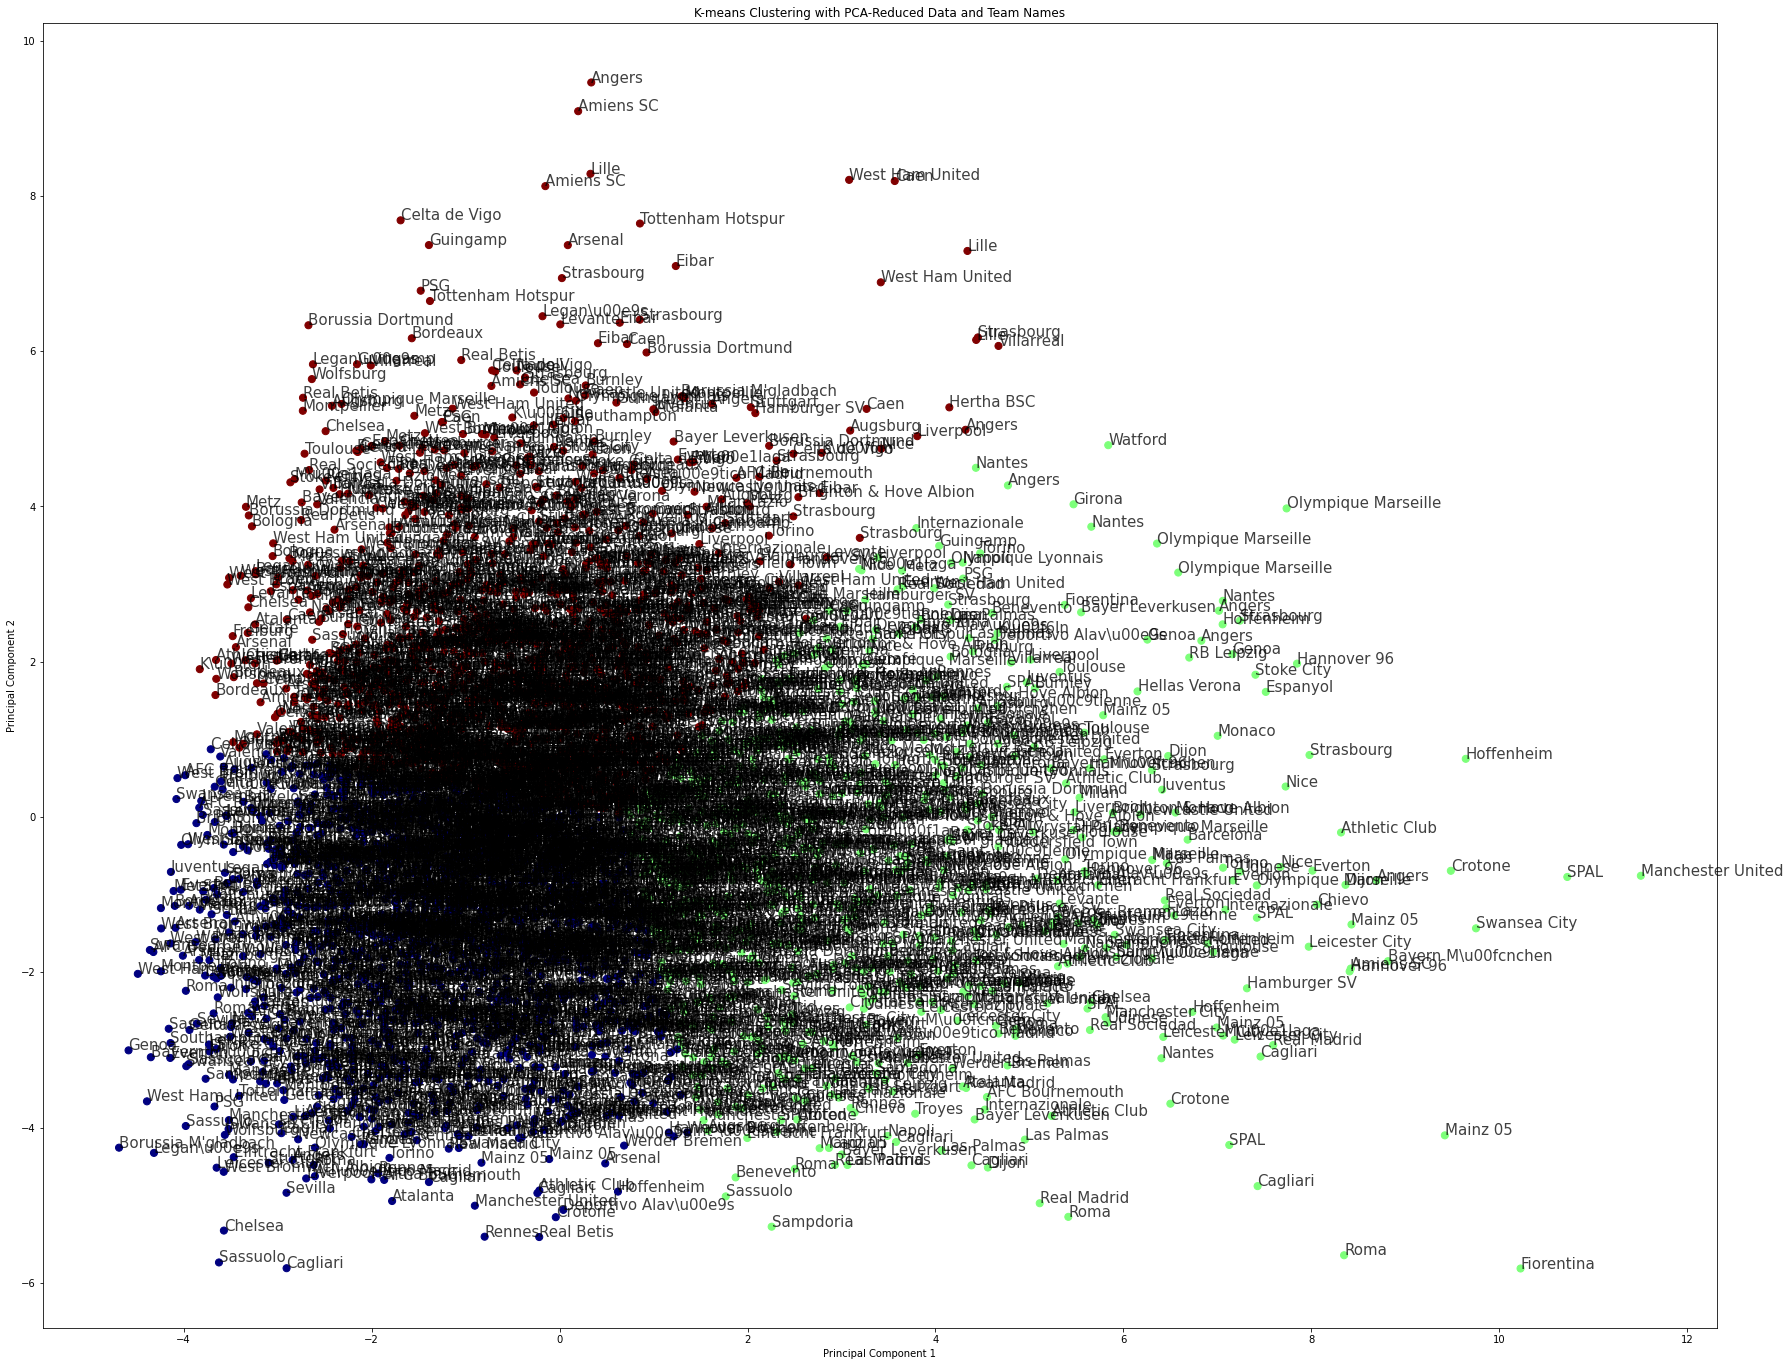

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(final_df_scaled)

# Create the scatter plot
plt.figure(figsize=(30, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, s=50, cmap='jet')

# Annotate each point with the team name
for i, team_name in enumerate(clustered_teams_with_names['name']):
    plt.annotate(team_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=15, alpha=0.75)

# Adding title and labels
plt.title('K-means Clustering with PCA-Reduced Data and Team Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [34]:
labeled_team_df = matches_with_clusters.loc[:,['uniqueTeamId', 'matchId', 'teamId', 'KMeans_Labels']]

In [35]:
labeled_team_df

,uniqueTeamId,matchId,teamId,KMeans_Labels
0,10531---2499726,2499726,10531,0
1,1619---2499726,2499726,1619,0
2,10531---2499736,2499736,10531,0
3,1611---2499736,2499736,1611,1
4,10531---2499741,2499741,10531,0
...,...,...,...,...
3647,714---2565792,2565792,714,2
3648,714---2565728,2565728,714,0
3649,756---2565728,2565728,756,1
3650,714---2565923,2565923,714,1


In [36]:
unique, counts = np.unique(labeled_team_df.KMeans_Labels, return_counts=True)
dict(zip(unique, counts))

{0: 1500, 1: 886, 2: 1266}

In [37]:
# Step 1: Aggregate data by 'teamId' and 'KMeans_Labels' and count occurrences
label_counts = labeled_team_df.groupby(['teamId', 'KMeans_Labels']).size().reset_index(name='counts')

# Step 2: Calculate probability of each label for each team
total_counts = labeled_team_df['teamId'].value_counts().reset_index()
total_counts.columns = ['teamId', 'total']

# Merge counts with total counts to calculate probabilities
label_prob = pd.merge(label_counts, total_counts, on='teamId')
label_prob['probability'] = label_prob['counts'] / label_prob['total']

# Pivot the data to have labels as columns
prob_pivot = label_prob.pivot(index='teamId', columns='KMeans_Labels', values='probability').fillna(0)

prob_pivot['max_label'] = prob_pivot.iloc[:, :-1].idxmax(axis=1)


# Ensuring all labels are represented
all_labels = sorted(labeled_team_df['KMeans_Labels'].unique())
for label in all_labels:
    if label not in prob_pivot.columns:
        prob_pivot[label] = 0  # Add missing label columns with 0 probability

# Now, recalculate max_label
prob_pivot['max_label'] = prob_pivot[all_labels].idxmax(axis=1)

# The updated DataFrame prob_pivot should now correctly reflect the max_label including label '3'
majority_voting_res = prob_pivot

majority_voting_res = majority_voting_res.reset_index()

In [38]:
majority_voting_res

KMeans_Labels,teamId,0,1,2,max_label
0,674,0.526316,0.236842,0.236842,0
1,675,0.526316,0.447368,0.026316,0
2,676,0.605263,0.289474,0.105263,0
3,677,0.473684,0.131579,0.394737,0
4,678,0.368421,0.157895,0.473684,2
...,...,...,...,...,...
93,3795,0.552632,0.289474,0.157895,0
94,3799,0.447368,0.315789,0.236842,0
95,3804,0.315789,0.315789,0.368421,2
96,10531,0.657895,0.210526,0.131579,0


In [39]:
def extract_value(row):
        # Check if the index is within the valid range for the DataFrame columns
        if row['max_label'] < 0 or row['max_label'] >= len(majority_voting_res.columns):
            raise IndexError(f"Index {row['max_label']} out of bounds for column lookup.")
        
        val = row["max_label"]
        return row[val]

majority_voting_res['max_label_prob'] = majority_voting_res.apply(extract_value, axis=1)

In [40]:
majority_voting_res

KMeans_Labels,teamId,0,1,2,max_label,max_label_prob
0,674,0.526316,0.236842,0.236842,0,0.526316
1,675,0.526316,0.447368,0.026316,0,0.526316
2,676,0.605263,0.289474,0.105263,0,0.605263
3,677,0.473684,0.131579,0.394737,0,0.473684
4,678,0.368421,0.157895,0.473684,2,0.473684
...,...,...,...,...,...,...
93,3795,0.552632,0.289474,0.157895,0,0.552632
94,3799,0.447368,0.315789,0.236842,0,0.447368
95,3804,0.315789,0.315789,0.368421,2,0.368421
96,10531,0.657895,0.210526,0.131579,0,0.657895


In [41]:
unique, counts = np.unique(majority_voting_res.max_label, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 7, 2: 41}

In [42]:
np.quantile(majority_voting_res.max_label_prob, .3)

0.44969040247678016

In [43]:
filtered_major = majority_voting_res[majority_voting_res['max_label_prob']>= .5]

In [44]:
teams_df = teams_df.loc[:,["wyId", "name"]]

merged_df_tmp = pd.merge(majority_voting_res, teams_df, left_on='teamId', right_on='wyId', how='left')

# Selecting the columns to include in the final DataFrame (if needed to remove the ID from df2)
majority_voting_res_named = merged_df_tmp.drop(columns=['wyId'])

In [45]:
team_ids

0       10531---2499726
1       10531---2499736
2       10531---2499741
3       10531---2499757
4       10531---2499766
             ...       
3647      756---2565880
3648      756---2565892
3649      756---2565904
3650      756---2565908
3651      756---2565923
Name: uniqueTeamId, Length: 3652, dtype: object

In [46]:
#selected_features_df["uniqueTeamId"] = team_ids
#selected_features_df = selected_features_df.reset_index()
selected_features_df['teamId'] = team_ids.apply(lambda x: x.split("---")[0])

In [47]:
filtered_major

KMeans_Labels,teamId,0,1,2,max_label,max_label_prob
0,674,0.526316,0.236842,0.236842,0,0.526316
1,675,0.526316,0.447368,0.026316,0,0.526316
2,676,0.605263,0.289474,0.105263,0,0.605263
8,683,0.368421,0.078947,0.552632,2,0.552632
9,684,0.578947,0.263158,0.157895,0,0.578947
10,687,0.526316,0.342105,0.131579,0,0.526316
13,695,0.500000,0.236842,0.263158,0,0.500000
15,698,0.368421,0.000000,0.631579,2,0.631579
16,701,0.184211,0.184211,0.631579,2,0.631579
17,712,0.289474,0.078947,0.631579,2,0.631579


In [48]:
grouped_mean_df = selected_features_df.groupby('teamId').mean().reset_index()
grouped_mean_df.teamId = grouped_mean_df.teamId.astype(int)
team_name_n_label_df = majority_voting_res_named.loc[:,["teamId", "name", "max_label"]]
grouped_mean_df = grouped_mean_df.merge(team_name_n_label_df)
grouped_mean_df = pd.merge(grouped_mean_df, filtered_major, on='teamId', how='inner')


names = grouped_mean_df.name
labels = grouped_mean_df.max_label_x

grouped_mean_df = grouped_mean_df.iloc[:,1:31]

In [49]:
scaled_data

array([[-0.25622218, -0.74234261, -0.54745316, ..., -1.08851972,
        -0.024577  , -0.53909156],
       [-0.25622218, -0.12838431, -0.83927902, ..., -0.36482155,
        -0.28218499,  1.03717937],
       [ 1.49771111, -1.15164814, -0.54745316, ..., -0.36482155,
         0.65484403, -0.53909156],
       ...,
       [ 2.37467776,  0.89487952, -0.54745316, ..., -0.36482155,
        -0.1391849 , -0.53909156],
       [ 0.03610003,  0.07626846, -0.25562731, ..., -0.36482155,
        -0.55844999,  1.03717937],
       [ 0.03610003, -1.15164814, -0.83927902, ...,  0.35887661,
         0.83002738, -0.53909156]])

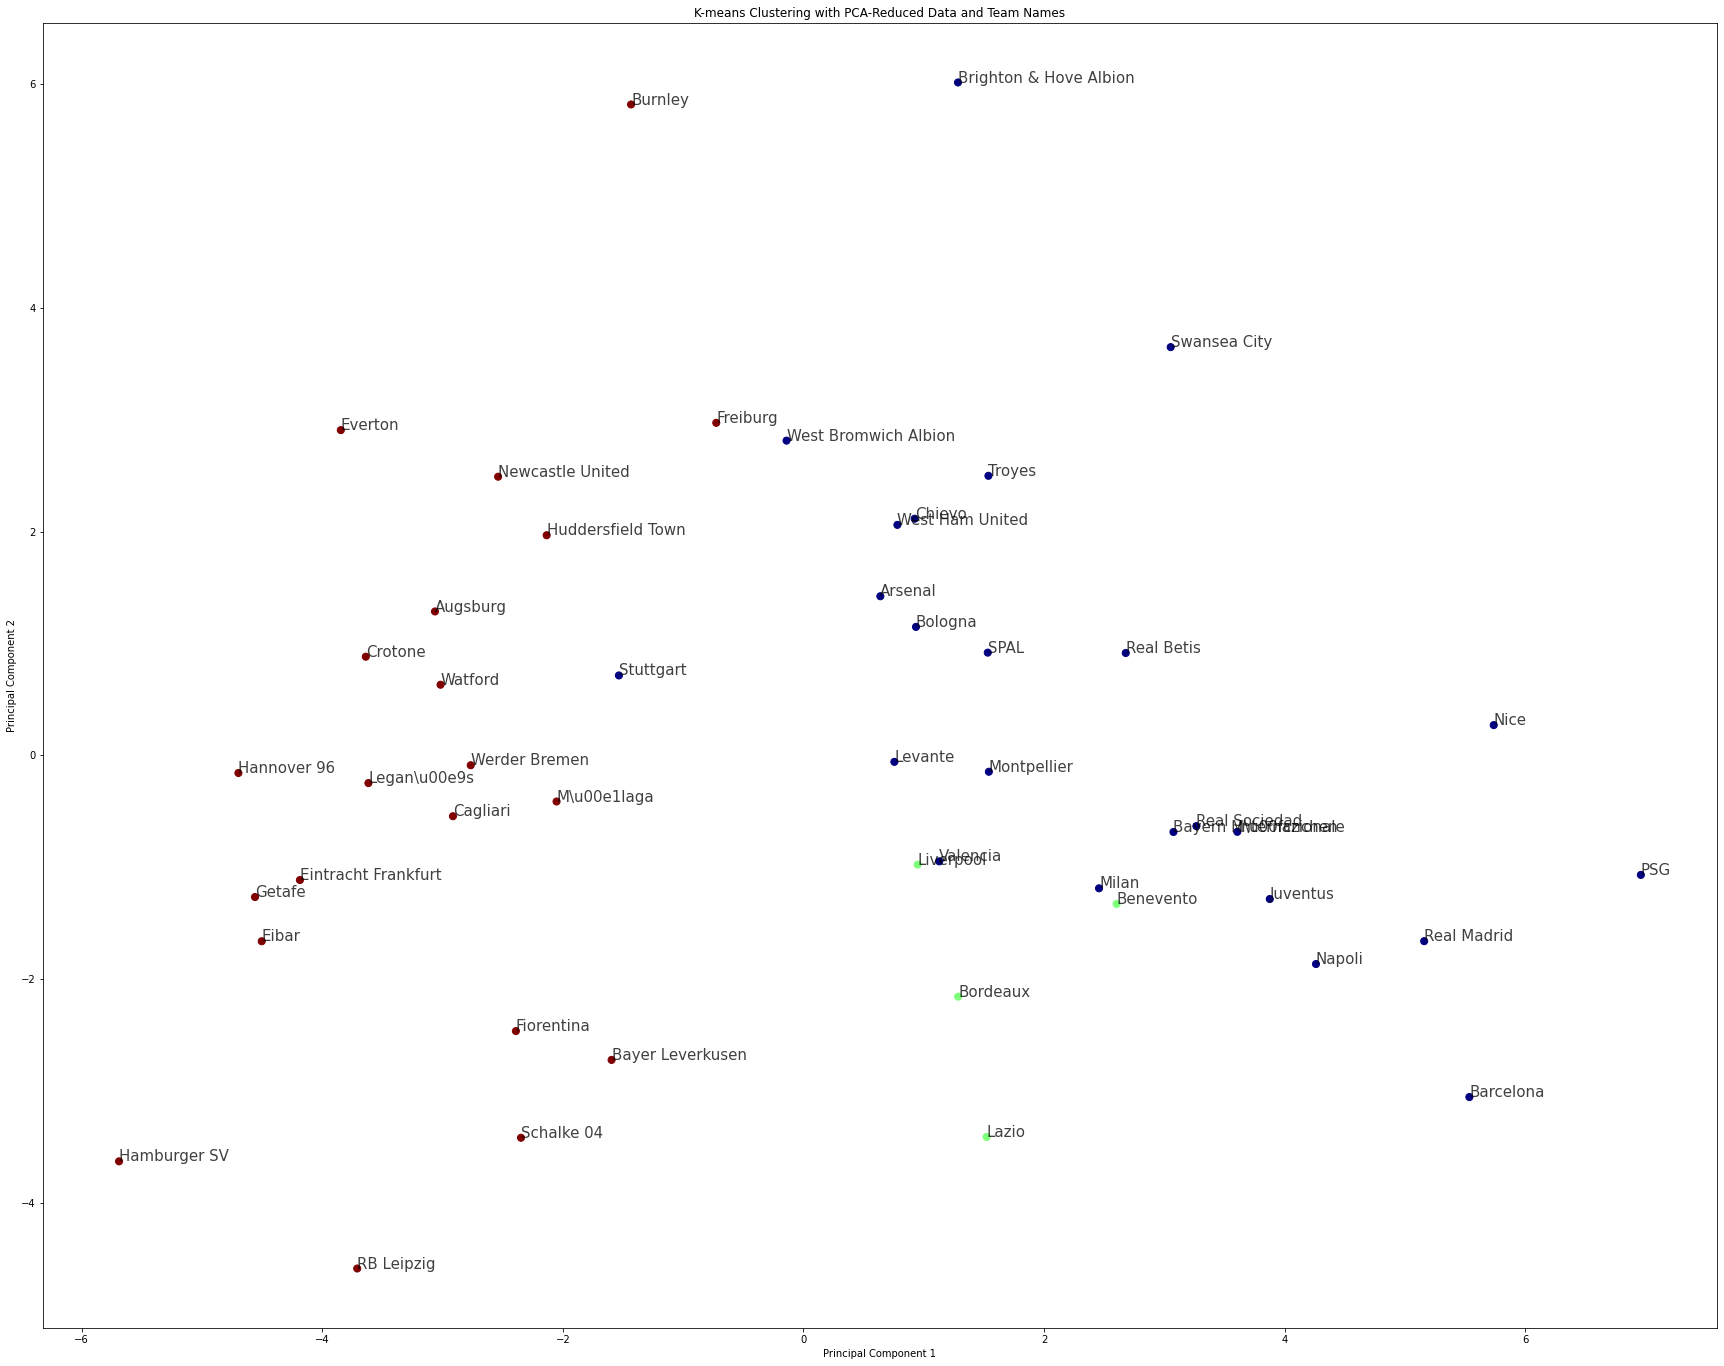

Loadings:
                                     PC1       PC2
Air duel_Zone_1               -0.221858  0.204932
Air duel_Zone_2               -0.262010  0.124047
Air duel_Zone_3               -0.234473  0.212804
Foul_Zone_1                   -0.168224 -0.010881
Foul_Zone_2                   -0.184853 -0.164693
Foul_Zone_3                   -0.171793 -0.252756
Ground attacking duel_Zone_1   0.044670 -0.156244
Ground attacking duel_Zone_2  -0.118922 -0.237564
Ground attacking duel_Zone_3  -0.122218 -0.267351
Ground defending duel_Zone_1  -0.207271  0.114109
Ground defending duel_Zone_2  -0.194793 -0.196047
Ground defending duel_Zone_3  -0.072892 -0.268418
Ground loose ball duel_Zone_1 -0.260334  0.081309
Ground loose ball duel_Zone_2 -0.289573 -0.021531
Ground loose ball duel_Zone_3 -0.260349  0.020605
Touch_Zone_1                   0.076096 -0.040368
Touch_Zone_2                   0.012656 -0.279011
Touch_Zone_3                  -0.085544 -0.232179
Acceleration                   0.118190

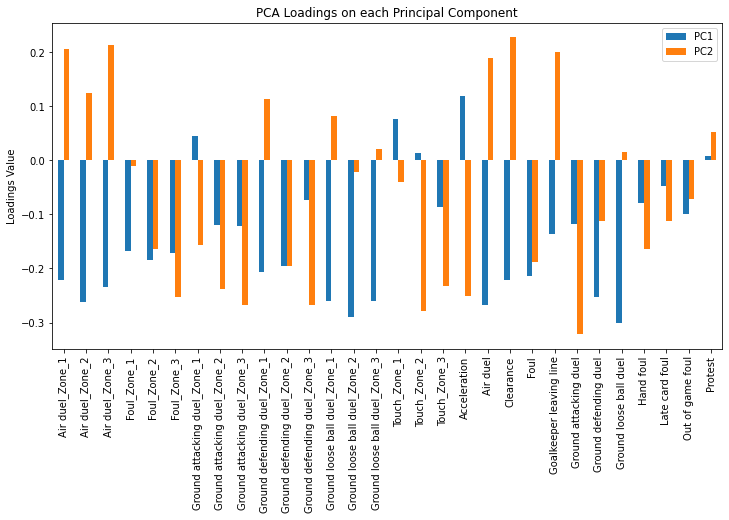

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

scaled_data = scaler.fit_transform(grouped_mean_df)

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create the scatter plot
plt.figure(figsize=(30, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, cmap='jet')

# Annotate each point with the team name
for i, team_name in enumerate(names):
    plt.annotate(team_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=15, alpha=0.75)

# Adding title and labels
plt.title('K-means Clustering with PCA-Reduced Data and Team Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the loadings (components)
loadings = pca.components_.T
feature_names = grouped_mean_df.columns

# Create a DataFrame of loadings with features
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)
print("Loadings:\n", loading_matrix)

# Optionally, plot the magnitude of each loading per principal component
loading_matrix.plot(kind='bar', figsize=(12, 6), title="PCA Loadings on each Principal Component")
plt.ylabel('Loadings Value')
plt.show()

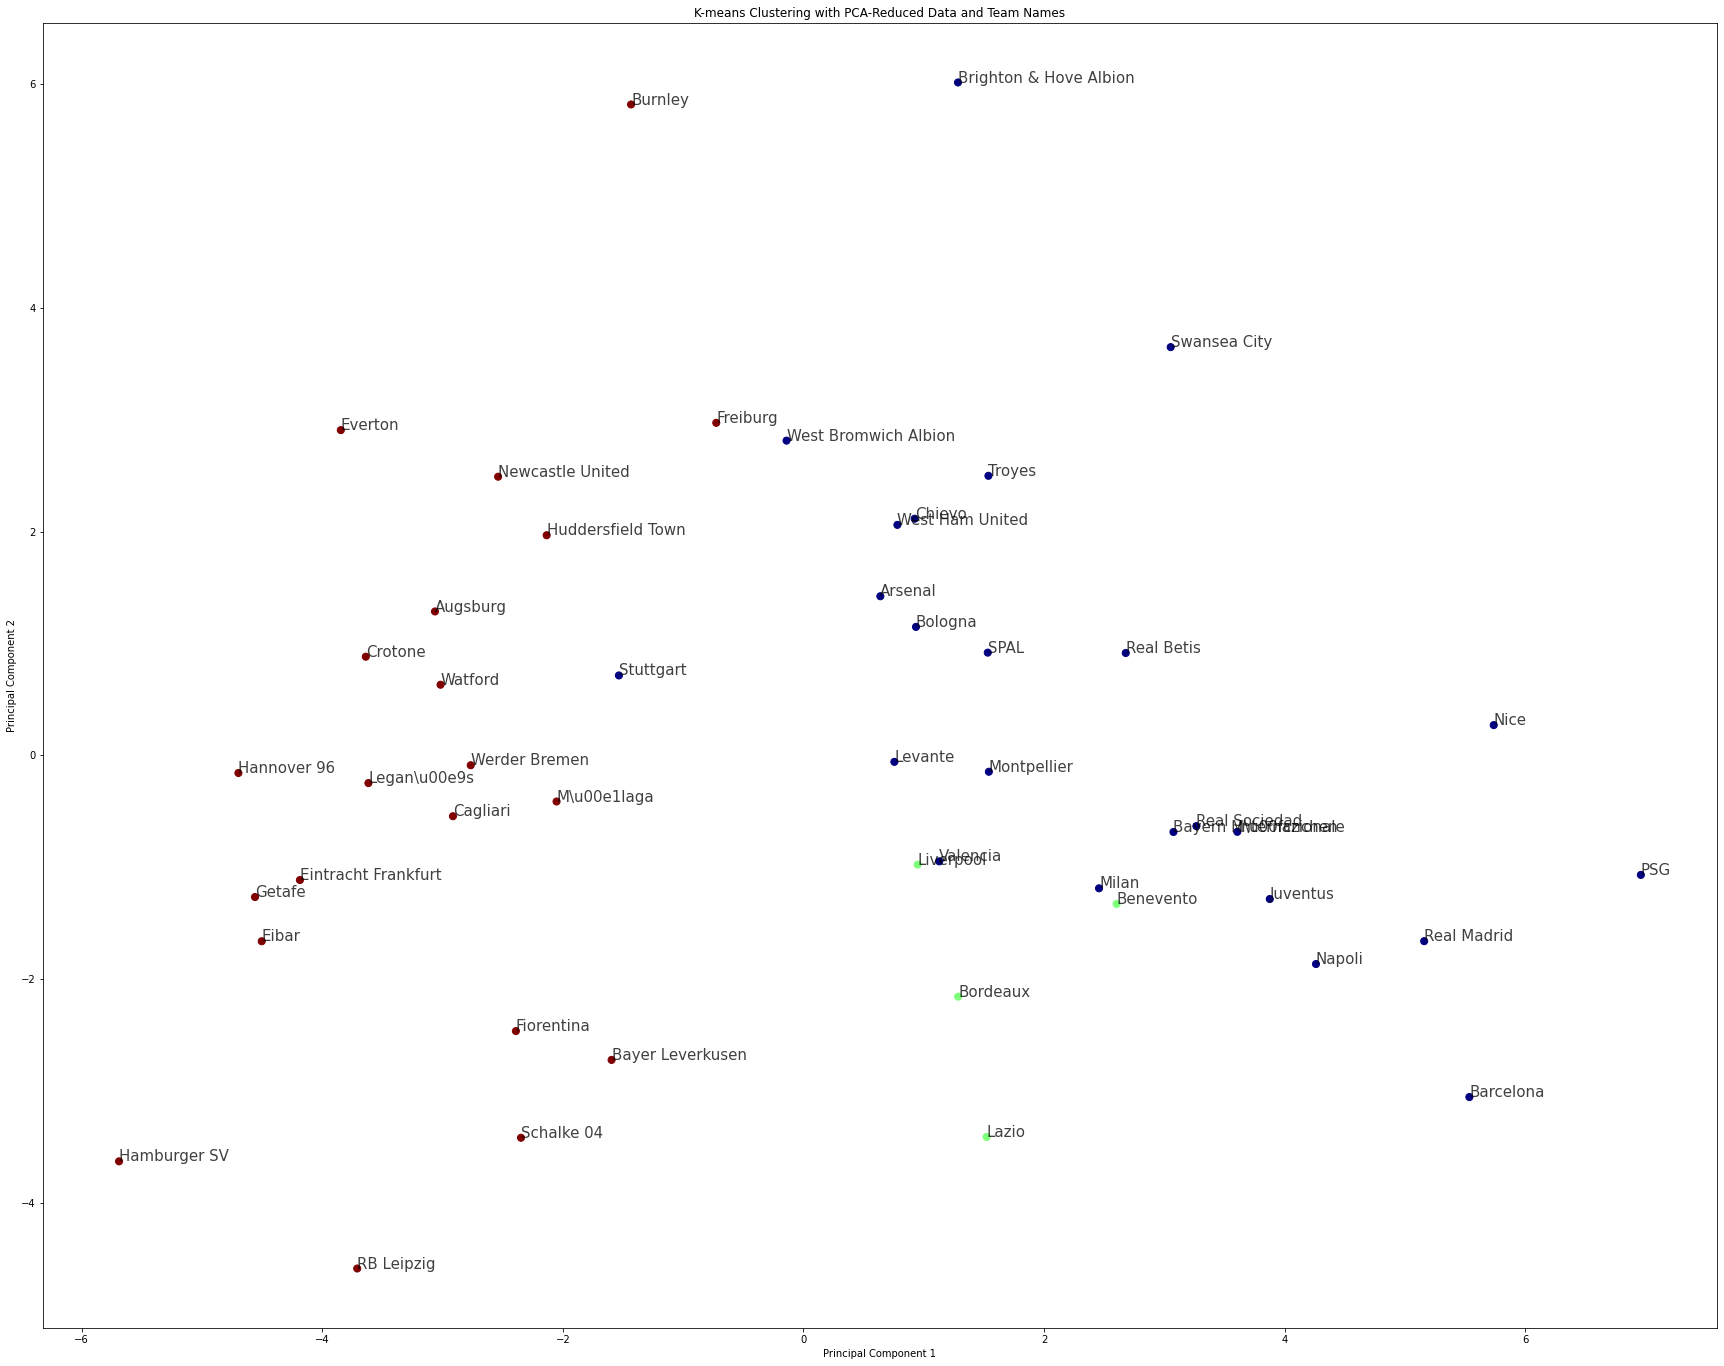

Loadings:
                                     PC1       PC2
Air duel_Zone_1               -0.221858  0.204932
Air duel_Zone_2               -0.262010  0.124047
Air duel_Zone_3               -0.234473  0.212804
Foul_Zone_1                   -0.168224 -0.010881
Foul_Zone_2                   -0.184853 -0.164693
Foul_Zone_3                   -0.171793 -0.252756
Ground attacking duel_Zone_1   0.044670 -0.156244
Ground attacking duel_Zone_2  -0.118922 -0.237564
Ground attacking duel_Zone_3  -0.122218 -0.267351
Ground defending duel_Zone_1  -0.207271  0.114109
Ground defending duel_Zone_2  -0.194793 -0.196047
Ground defending duel_Zone_3  -0.072892 -0.268418
Ground loose ball duel_Zone_1 -0.260334  0.081309
Ground loose ball duel_Zone_2 -0.289573 -0.021531
Ground loose ball duel_Zone_3 -0.260349  0.020605
Touch_Zone_1                   0.076096 -0.040368
Touch_Zone_2                   0.012656 -0.279011
Touch_Zone_3                  -0.085544 -0.232179
Acceleration                   0.118190

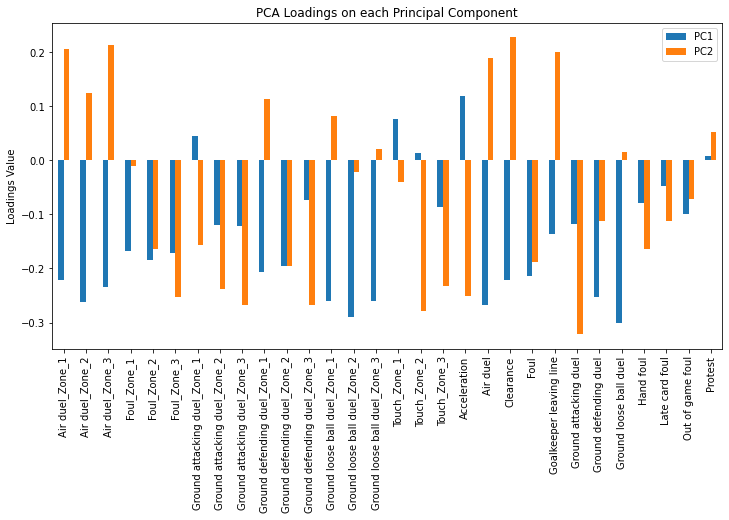

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

scaled_data = scaler.fit_transform(grouped_mean_df)

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create the scatter plot
plt.figure(figsize=(30, 24))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, cmap='jet')

# Annotate each point with the team name
for i, team_name in enumerate(names):
    plt.annotate(team_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=15, alpha=0.75)

# Adding title and labels
plt.title('K-means Clustering with PCA-Reduced Data and Team Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print the loadings (components)
loadings = pca.components_.T
feature_names = grouped_mean_df.columns

# Create a DataFrame of loadings with features
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)
print("Loadings:\n", loading_matrix)

# Optionally, plot the magnitude of each loading per principal component
loading_matrix.plot(kind='bar', figsize=(12, 6), title="PCA Loadings on each Principal Component")
plt.ylabel('Loadings Value')
plt.show()

In [52]:
df_with_clusters

,index,uniqueTeamId,Air duel_Zone_1,Air duel_Zone_2,Air duel_Zone_3,Foul_Zone_1,Foul_Zone_2,Foul_Zone_3,Ground attacking duel_Zone_1,Ground attacking duel_Zone_2,...,Middle Run,Long Run,average_acceleration_length,Forward_Runs_Zone_3,TeamID,KMeans_Labels,GMM_Labels,BKMeans_Labels,matchId,teamId
0,0,10531---2499726,4,6,3,0,3,1,4,19,...,1.0,0.0,27.911288,0.0,10531---2499726,0,0,2,2499726,10531
1,1,10531---2499736,4,9,2,2,3,1,10,11,...,1.0,1.0,25.469525,1.0,10531---2499736,0,0,2,2499736,10531
2,2,10531---2499741,10,4,3,0,3,0,3,13,...,2.0,1.0,34.351247,0.0,10531---2499741,0,0,2,2499741,10531
3,3,10531---2499757,8,4,5,0,1,2,6,11,...,0.0,3.0,43.278582,0.0,10531---2499757,0,0,2,2499757,10531
4,4,10531---2499766,4,9,6,2,1,1,9,11,...,0.0,0.0,0.000000,0.0,10531---2499766,0,0,2,2499766,10531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,3647,756---2565880,5,4,10,1,4,2,7,14,...,2.0,2.0,26.437137,1.0,756---2565880,1,1,1,2565880,756
3648,3648,756---2565892,2,7,4,2,8,3,3,21,...,3.0,2.0,30.048182,1.0,756---2565892,1,1,1,2565892,756
3649,3649,756---2565904,13,14,3,2,2,1,13,13,...,1.0,1.0,26.824966,0.0,756---2565904,2,2,0,2565904,756
3650,3650,756---2565908,5,10,4,0,4,4,4,16,...,2.0,1.0,22.850920,1.0,756---2565908,1,1,1,2565908,756


In [53]:
df_with_clusters.iloc[:, 1:33]

,uniqueTeamId,Air duel_Zone_1,Air duel_Zone_2,Air duel_Zone_3,Foul_Zone_1,Foul_Zone_2,Foul_Zone_3,Ground attacking duel_Zone_1,Ground attacking duel_Zone_2,Ground attacking duel_Zone_3,...,Foul,Goalkeeper leaving line,Ground attacking duel,Ground defending duel,Ground loose ball duel,Hand foul,Late card foul,Out of game foul,Protest,Simulation
0,10531---2499726,4,6,3,0,3,1,4,19,11,...,4,1,34,31,12,1,0,0,0,0
1,10531---2499736,4,9,2,2,3,1,10,11,11,...,6,1,32,41,13,0,0,0,0,0
2,10531---2499741,10,4,3,0,3,0,3,13,15,...,3,1,31,22,29,0,0,0,0,0
3,10531---2499757,8,4,5,0,1,2,6,11,10,...,3,0,27,32,26,0,0,0,0,0
4,10531---2499766,4,9,6,2,1,1,9,11,10,...,4,1,30,29,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,756---2565880,5,4,10,1,4,2,7,14,27,...,7,1,48,30,20,0,0,0,0,0
3648,756---2565892,2,7,4,2,8,3,3,21,10,...,13,0,34,48,13,1,0,0,0,0
3649,756---2565904,13,14,3,2,2,1,13,13,12,...,5,0,38,46,26,0,0,0,0,0
3650,756---2565908,5,10,4,0,4,4,4,16,18,...,8,1,38,33,28,0,0,0,0,0


In [54]:
df_with_clusters.iloc[:, 2:34]

,Air duel_Zone_1,Air duel_Zone_2,Air duel_Zone_3,Foul_Zone_1,Foul_Zone_2,Foul_Zone_3,Ground attacking duel_Zone_1,Ground attacking duel_Zone_2,Ground attacking duel_Zone_3,Ground defending duel_Zone_1,...,Goalkeeper leaving line,Ground attacking duel,Ground defending duel,Ground loose ball duel,Hand foul,Late card foul,Out of game foul,Protest,Simulation,Time lost foul
0,4,6,3,0,3,1,4,19,11,15,...,1,34,31,12,1,0,0,0,0,0
1,4,9,2,2,3,1,10,11,11,21,...,1,32,41,13,0,0,0,0,0,0
2,10,4,3,0,3,0,3,13,15,7,...,1,31,22,29,0,0,0,0,0,0
3,8,4,5,0,1,2,6,11,10,20,...,0,27,32,26,0,0,0,0,0,0
4,4,9,6,2,1,1,9,11,10,13,...,1,30,29,19,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,5,4,10,1,4,2,7,14,27,7,...,1,48,30,20,0,0,0,0,0,0
3648,2,7,4,2,8,3,3,21,10,21,...,0,34,48,13,1,0,0,0,0,0
3649,13,14,3,2,2,1,13,13,12,28,...,0,38,46,26,0,0,0,0,0,0
3650,5,10,4,0,4,4,4,16,18,8,...,1,38,33,28,0,0,0,0,0,0


In [55]:
df_with_clusters.iloc[:, 2:49]

,Air duel_Zone_1,Air duel_Zone_2,Air duel_Zone_3,Foul_Zone_1,Foul_Zone_2,Foul_Zone_3,Ground attacking duel_Zone_1,Ground attacking duel_Zone_2,Ground attacking duel_Zone_3,Ground defending duel_Zone_1,...,Backward Run,Forward Run,Side Run,Short Run,Middle Run,Long Run,average_acceleration_length,Forward_Runs_Zone_3,TeamID,KMeans_Labels
0,4,6,3,0,3,1,4,19,11,15,...,0.0,1.0,0.0,0.0,1.0,0.0,27.911288,0.0,10531---2499726,0
1,4,9,2,2,3,1,10,11,11,21,...,0.0,3.0,0.0,1.0,1.0,1.0,25.469525,1.0,10531---2499736,0
2,10,4,3,0,3,0,3,13,15,7,...,0.0,3.0,1.0,1.0,2.0,1.0,34.351247,0.0,10531---2499741,0
3,8,4,5,0,1,2,6,11,10,20,...,0.0,3.0,1.0,1.0,0.0,3.0,43.278582,0.0,10531---2499757,0
4,4,9,6,2,1,1,9,11,10,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10531---2499766,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,5,4,10,1,4,2,7,14,27,7,...,0.0,6.0,0.0,2.0,2.0,2.0,26.437137,1.0,756---2565880,1
3648,2,7,4,2,8,3,3,21,10,21,...,0.0,7.0,0.0,2.0,3.0,2.0,30.048182,1.0,756---2565892,1
3649,13,14,3,2,2,1,13,13,12,28,...,0.0,3.0,0.0,1.0,1.0,1.0,26.824966,0.0,756---2565904,2
3650,5,10,4,0,4,4,4,16,18,8,...,0.0,6.0,1.0,4.0,2.0,1.0,22.850920,1.0,756---2565908,1


In [56]:
clustered_df_for_stats = pd.DataFrame(df_with_clusters.iloc[:, 2:49])

# List of columns to exclude from aggregation
cols_to_exclude = ['KMeans_Labels', 'TeamID']

# List of columns to include in the aggregation
cols_to_include = [col for col in clustered_df_for_stats.columns if col not in cols_to_exclude]

# Group by 'GMM_Labels' and calculate the mean and quantiles for each cluster
stats_per_cluster = clustered_df_for_stats.groupby('KMeans_Labels')[cols_to_include].agg('mean')
# Renaming the lambda functions for clarity in the output
#stats_per_cluster.columns = stats_per_cluster.columns.map('_'.join).str.replace('<lambda_0>', '25th_percentile').str.replace('<lambda_1>', '50th_percentile (median)').str.replace('<lambda_2>', '75th_percentile')

stats_per_cluster

,Air duel_Zone_1,Air duel_Zone_2,Air duel_Zone_3,Foul_Zone_1,Foul_Zone_2,Foul_Zone_3,Ground attacking duel_Zone_1,Ground attacking duel_Zone_2,Ground attacking duel_Zone_3,Ground defending duel_Zone_1,...,Zone_2_Run,Zone_3_Run,Backward Run,Forward Run,Side Run,Short Run,Middle Run,Long Run,average_acceleration_length,Forward_Runs_Zone_3
KMeans_Labels,,,,,,,,,,,,,,,,,,,,,
0,3.691333,7.629333,3.822000,1.129333,2.891333,1.496000,6.250000,14.783333,13.937333,14.416667,...,2.00000,0.218667,0.018000,2.744667,0.230000,0.892667,0.976000,1.124000,28.261083,0.175333
1,4.481941,8.680587,4.277652,1.134312,3.372460,1.709932,6.729120,17.375847,18.247178,15.718962,...,5.35553,1.044018,0.039503,7.598194,0.895034,3.054176,2.836343,2.642212,28.168603,0.787810
2,6.556872,12.657188,6.543444,1.482622,4.142180,2.038705,7.247235,19.161137,17.958926,18.852291,...,2.14218,0.290679,0.017378,2.939968,0.293049,1.018957,1.073460,1.157978,27.988761,0.227488


In [57]:
outcome_percentages

Match_Result                         Draw       Lose        Win
KMeans_Labels Opponent_Cluster                                 
0             0                 21.980198  39.009901  39.009901
              1                 20.204604  54.731458  25.063939
              2                 23.232323  38.383838  38.383838
1             0                 20.204604  25.063939  54.731458
              1                 28.440367  35.779817  35.779817
              2                 27.075812  27.797834  45.126354
2             0                 23.232323  38.383838  38.383838
              1                 27.075812  45.126354  27.797834
              2                 30.337079  34.831461  34.831461

In [25]:
outcome_percentages

Match_Result,Draw,Lose,Win
KMeans_Labels,,,
0,21.600000,43.066667,35.333333
1,24.379233,28.555305,47.065463
2,29.067930,37.361769,33.570300


In [65]:
majority_voting_res.iloc[:,:-2].to_csv('cluster_probs/trans_out_of_poss_cluster_probs.csv', index=True)
majority_voting_res.iloc[:,:-2]

KMeans_Labels,teamId,0,1,2
0,674,0.526316,0.236842,0.236842
1,675,0.526316,0.447368,0.026316
2,676,0.605263,0.289474,0.105263
3,677,0.473684,0.131579,0.394737
4,678,0.368421,0.157895,0.473684
...,...,...,...,...
93,3795,0.552632,0.289474,0.157895
94,3799,0.447368,0.315789,0.236842
95,3804,0.315789,0.315789,0.368421
96,10531,0.657895,0.210526,0.131579
